# Riesgos de consumo de alcohol y accidentes viales

El archivo riesgo_alcohol.csv indica el riesgo relativo de sufrir un
accidente de auto, en funcion del nivel de alcohol en sangre del conduc-
tor (medido en gramos por cada 100ml), tomando como 1 el riesgo de
sufrir un accidente sin haber consumido alcohol. De este modo, con un
nivel de alcohol en sangre de 0:07 el riesgo es 2:09, es decir: algo mas
del doble de riesgo que sin haber consumido alcohol.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

    Alcohol_en_Sangre  Riesgo_relativo
0                0.00             1.00
1                0.01             1.03
2                0.03             1.06
3                0.05             1.38
4                0.07             2.09
5                0.09             3.54
6                0.11             6.41
7                0.13            12.60
8                0.15            22.10
9                0.17            39.05
10               0.19            65.32
11               0.21            99.78


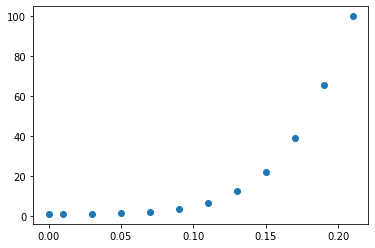

In [3]:
datos = pd.read_csv("riesgo_alcohol.csv")
datosNP = datos.to_numpy()
print(datos)
x = datosNP[:,0]
y = datosNP[:,1]
plt.scatter(x,y)

yRaya =  21.279999999999998
 
371.9 x - 16.22
R2 =  0.6911897798495068


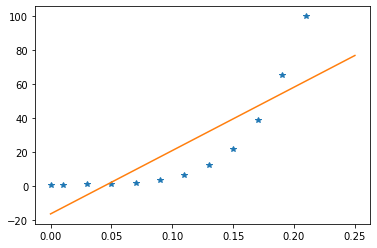

In [4]:
def Rcuad(x,y,x_plt):
    yRaya = sum(y)/len(y)
    print("yRaya = ", yRaya)
    
    c = np.polyfit(x, y, 1)
    p = np.poly1d(c)
    print(p)

    yAsterisco = p(x)
    R2 = np.linalg.norm(yAsterisco - yRaya, 2)**2 / np.linalg.norm(y - yRaya, 2)**2
    print("R2 = ", R2)
    plt.plot(x,y,"*")
    plt.plot(x_plt,p(x_plt))

x_plt = np.linspace(0,0.25,100)
Rcuad(x,y,x_plt)                 # y SIN TRANSFORMAR

yRaya =  1.8621203835743003
 
23.82 x - 0.5395
R2 =  0.9712205492503558


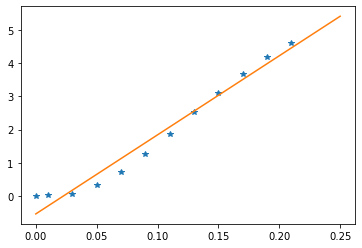

In [5]:
def RcuadLineal(x,y,x_plt):
    yRaya = sum(y)/len(y)
    print("yRaya = ", yRaya)
    
    c = np.polyfit(x, y, 1)
    p = np.poly1d(c)
    print(p)

    yAsterisco = p(x)
    R2 = np.linalg.norm(yAsterisco - yRaya, 2)**2 / np.linalg.norm(y - yRaya, 2)**2
    print("R2 = ", R2)
    plt.plot(x,y,"*")
    plt.plot(x_plt,p(x_plt))

z = np.log(y)       # y TRANSFORMADA
x_plt = np.linspace(0,0.25,100)
RcuadLineal(x,z,x_plt)

Dado el valor del $R^2$ del ajuste lineal por cuadrados mínimos ordinarios (luego de transformar la variable $y$ a $z = ln(y)$, se puede decir que este es un relativamente buen ajuste a las variables. No ocurre así cuando la variable $y$ no es transformada, que da un mal ajuste.

 
26.09 x - 0.5947
[ 1.    1.03  1.06  1.38  2.09  3.54  6.41 12.6  22.1  39.05 65.32 99.78]


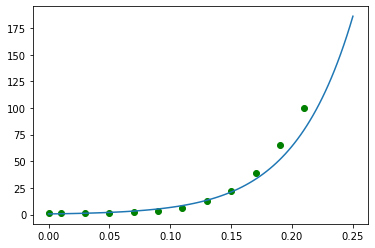

In [6]:
# TRANSFORMO     ln(y) = ln(a) + b*ln(x+1)
z = np.log(y)
t = np.log(x+1)

unos = np.ones(len(x))
A = np.c_[unos, t]
At = np.transpose(A)
c1 = np.linalg.solve(At @ A, At @ z)   
a = np.e**c1[0] 
b = c1[1]
c1_up = np.flipud(c1)
p1 = np.poly1d(c1_up)
print(p1)

# Graficamos el ajuste de la variable original
plt.scatter(x, y, c = "g")

def f(x,a,b):
    return(a * (x + 1)**b)
x_plt = np.linspace(0,0.25,100)
ajuste = f(x_plt,a,b)
plt.plot(x_plt, ajuste)

print(y)

In [7]:
# Calculo el error cometido:
x = datosNP[:,0]
predichos = f(x,a,b)
print(predichos)
Error_ord = np.sum(y - predichos)**2
print("El error total tomando un ajuste a*(x+1)**b es de:", Error_ord)

[ 0.55173655  0.71527162  1.19299573  1.97030773  3.22342639  5.22567345
  8.3975302  13.38079589 21.14766776 33.16008152 51.60092308 79.70737457]
El error total tomando un ajuste a*(x+1)**b es de: 1231.0425187512471


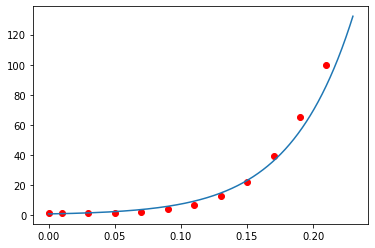

In [8]:
# Cuadrados Mínimos Generalizados:
w = y**2
W = np.diag(w)

# Resolvemos el sistema At * W * A * c = At * W * z
z = np.log(y)
unos = np.ones(len(x))
A = np.c_[unos, x]
At = np.transpose(A)
c2 = np.linalg.solve(At @ W @ A, At @ W @ z)   # c[0] = alfa, c[1] = beta
p2 = np.poly1d(np.array([c2[1], c2[0]]))

# Graficamos el ajuste de la variable original
plt.scatter(x, y, c = "r")

# c1[0] = alfa = ln(a), c1[1] = beta = b
a2 = np.e**c2[0]
b2 = c2[1]
x_plt = np.linspace(0, 0.23, 1000)
plt.plot(x_plt, a2*(x_plt+1)**b)

In [9]:
Error_gen = np.sum(y - a2*(x+1)**b)**2
print("El error total tomando un ajuste a*(x+1)**b es de:", Error_gen)

El error total tomando un ajuste a*(x+1)**b es de: 291.18831622858977


Si bien el error es grande tomando mínimos cuadrados (ya sea generalizados u ordinarios), se observa que tomando el método de generalizados, que tiene en cuenta el peso (residuo) de las observaciones, el error se reduce mucho respecto a tomando la técnica de ordinarios.

Grafico todos los ajustes

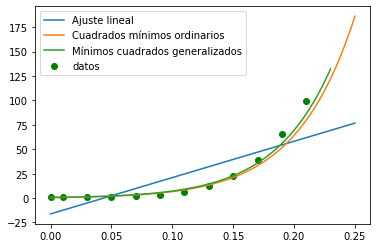

In [10]:
x = datosNP[:,0]
y = datosNP[:,1]
z = np.log(y)
x_plt = np.linspace(0,0.25,100)
plt.scatter(x, y, c = "g",label="datos")

# Mínimos cuadrados (lineal):
c = np.polyfit(x, y, 1)
p = np.poly1d(c)
plt.plot(x_plt,p(x_plt),label="Ajuste lineal")

# Mínimos cuadrados ordinarios:
# TRANSFORMO     ln(y) = ln(a) + b*ln(x+1)
unos = np.ones(len(x))
A = np.c_[unos, t]
At = np.transpose(A)
c1 = np.linalg.solve(At @ A, At @ z)   
a = np.e**c1[0] 
b = c1[1]
c1_up = np.flipud(c1)
p1 = np.poly1d(c1_up)
def f(x,a,b):
    return(a * (x + 1)**b)
ajuste = f(x_plt,a,b)
plt.plot(x_plt, ajuste,label="Cuadrados mínimos ordinarios")

# Mínimos cuadrados generalizados:
w = y**2
W = np.diag(w)
A = np.c_[unos, x]
At = np.transpose(A)
c2 = np.linalg.solve(At @ W @ A, At @ W @ z)   # c[0] = alfa, c[1] = beta
p2 = np.poly1d(np.array([c2[1], c2[0]]))
# c1[0] = alfa = ln(a), c1[1] = beta = b
a2 = np.e**c2[0]
b2 = c2[1]
x_plt = np.linspace(0, 0.23, 1000)
plt.plot(x_plt, a2*(x_plt+1)**b,label="Mínimos cuadrados generalizados")



plt.legend()